In [1]:
!pip install pygeometry


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.0/221.0 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.4/91.4 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pygeometry: filename=PyGeometry-1.5.6-py3-none-any.whl size=68809 sha256=f402dd05bc401a362b9c40ee3eb0496590609f2ece448da849f98fe0529df629
  Stored in directory: /root/.cache/pip/wheels/04/fd/59/93da83fde2676b0db9e0124147a63a883a1cdced4eaa85fdf4
  Created wheel for PyContracts: filename=PyContracts-1.8.12-py3-none-any.whl size=89657 sha256=cb9b4e2a23379d768064f9532682a4730febb856babe91872b76f4f4c91949ba
  Stored in directory: /root/.cache/pip/wheels/25/a1/c6/a6f808ed75dca3a0b37d675acf0d27047709bbbfc6873451d9
Successfully built pygeometry PyContracts


In [2]:
# Install rdkit
!pip install rdkit-pypi


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 38.6 MB/s eta 0:00:00


In [3]:
pip install deepchem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 12.8 MB/s eta 0:00:00


In [4]:
# Install PyTorch
!pip install torch
# Install torch-scatter, torch-sparse, torch-cluster, torch-spline-conv
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-1.9.0+cpu.html

# Install torch-geometric
!pip install torch-geometric



  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [5]:
import rdkit
from rdkit import Chem


In [6]:
from rdkit import Chem
from rdkit.Chem.Draw import MolToImage
import deepchem as dc
import requests
import torch
import random
import numpy as np
import json
import time


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


In [9]:
import pandas as pd
df=pd.read_csv('data/raw/HIV.csv')
print(df.head(5))
df["HIV_active"].value_counts()

                                              smiles activity  HIV_active
0  CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...       CI           0
1  C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...       CI           0
2                   CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21       CI           0
3    Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1       CI           0
4                             O=S(=O)(O)CCS(=O)(=O)O       CI           0


HIV_active
0    39684
1     1443
Name: count, dtype: int64

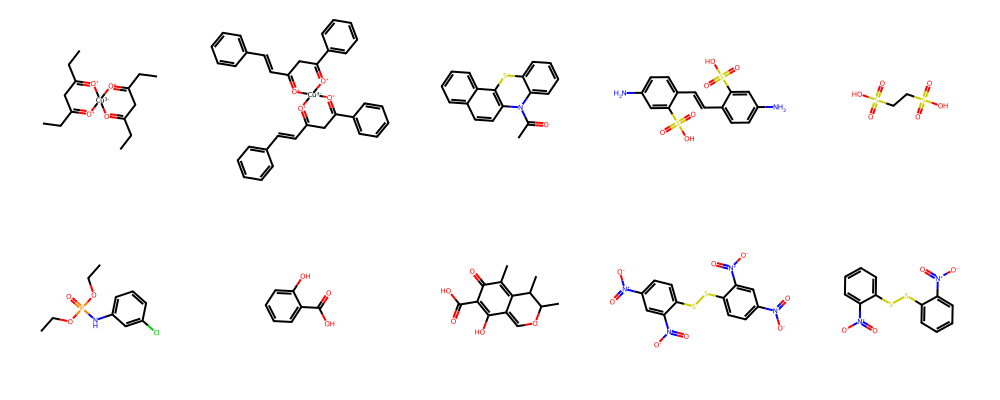

In [10]:
from rdkit.Chem import Draw
sample_smiles=df["smiles"][:10].values
sample_mols=[Chem.MolFromSmiles(smiles) for smiles in sample_smiles]
grid=Draw.MolsToGridImage(sample_mols,molsPerRow=5)
grid

In [11]:
import pandas as pd
from rdkit import Chem
import torch
import torch_geometric
from torch_geometric.data import Dataset, Data
import numpy as np
import os
from tqdm import tqdm

print(f"Torch version: {torch.__version__}")
print(f"Cuda available: {torch.cuda.is_available()}")
print(f"Torch geometric version: {torch_geometric.__version__}")

Torch version: 2.3.0+cu121
Cuda available: True
Torch geometric version: 2.5.3


In [12]:
class MoleculeDataset(Dataset):
    def __init__(self, root, filename, test=False, transform=None, pre_transform=None):
        """
        root = Where the dataset should be stored. This folder is split
        into raw_dir (downloaded dataset) and processed_dir (processed data).
        """
        self.test = test
        self.filename = filename
        super(MoleculeDataset, self).__init__(root, transform, pre_transform)

    @property
    def raw_file_names(self):
        """ If this file exists in raw_dir, the download is not triggered.
            (The download func. is not implemented here)
        """
        return self.filename

    @property
    def processed_file_names(self):
        """ If these files are found in raw_dir, processing is skipped"""
        self.data = pd.read_csv(self.raw_paths[0]).reset_index()

        if self.test:
            return [f'data_test_{i}.pt' for i in list(self.data.index)]
        else:
            return [f'data_{i}.pt' for i in list(self.data.index)]

    def download(self):
        pass

    def process(self):
        self.data = pd.read_csv(self.raw_paths[0])
        for index, mol in tqdm(self.data.iterrows(), total=self.data.shape[0]):
            mol_obj = Chem.MolFromSmiles(mol["smiles"])
            # Get node features
            node_feats = self._get_node_features(mol_obj)
            # Get edge features
            edge_feats = self._get_edge_features(mol_obj)
            # Get adjacency info
            edge_index = self._get_adjacency_info(mol_obj)
            # Get labels info
            label = self._get_labels(mol["HIV_active"])

            # Create data object
            data = Data(x=node_feats,
                        edge_index=edge_index,
                        edge_attr=edge_feats,
                        y=label,
                        smiles=mol["smiles"]
                        )
            if self.test:
                torch.save(data,
                    os.path.join(self.processed_dir,
                                 f'data_test_{index}.pt'))
            else:
                torch.save(data,
                    os.path.join(self.processed_dir,
                                 f'data_{index}.pt'))

    def _get_node_features(self, mol):
        """
        This will return a matrix / 2d array of the shape
        [Number of Nodes, Node Feature size]
        """
        all_node_feats = []

        for atom in mol.GetAtoms():
            node_feats = []
            # Feature 1: Atomic number
            node_feats.append(atom.GetAtomicNum())
            # Feature 2: Atom degree
            node_feats.append(atom.GetDegree())
            # Feature 3: Formal charge
            node_feats.append(atom.GetFormalCharge())
            # Feature 4: Hybridization
            node_feats.append(atom.GetHybridization())
            # Feature 5: Aromaticity
            node_feats.append(atom.GetIsAromatic())
            # Feature 6: Total Num Hs
            node_feats.append(atom.GetTotalNumHs())
            # Feature 7: Radical Electrons
            node_feats.append(atom.GetNumRadicalElectrons())
            # Feature 8: In Ring
            node_feats.append(atom.IsInRing())
            # Feature 9: Chirality
            node_feats.append(atom.GetChiralTag())

            # Append node features to matrix
            all_node_feats.append(node_feats)

        all_node_feats = np.asarray(all_node_feats)
        return torch.tensor(all_node_feats, dtype=torch.float)

    def _get_edge_features(self, mol):
        """
        This will return a matrix / 2d array of the shape
        [Number of edges, Edge Feature size]
        """
        all_edge_feats = []

        for bond in mol.GetBonds():
            edge_feats = []
            # Feature 1: Bond type (as double)
            edge_feats.append(bond.GetBondTypeAsDouble())
            # Feature 2: Rings
            edge_feats.append(bond.IsInRing())
            # Append node features to matrix (twice, per direction)
            all_edge_feats += [edge_feats, edge_feats]

        all_edge_feats = np.asarray(all_edge_feats)
        return torch.tensor(all_edge_feats, dtype=torch.float)

    def _get_adjacency_info(self, mol):
        """
        We could also use rdmolops.GetAdjacencyMatrix(mol)
        but we want to be sure that the order of the indices
        matches the order of the edge features
        """
        edge_indices = []
        for bond in mol.GetBonds():
            i = bond.GetBeginAtomIdx()
            j = bond.GetEndAtomIdx()
            edge_indices += [[i, j], [j, i]]

        edge_indices = torch.tensor(edge_indices)
        edge_indices = edge_indices.t().to(torch.long).view(2, -1)
        return edge_indices

    def _get_labels(self, label):
        label = np.asarray([label])
        return torch.tensor(label, dtype=torch.int64)

    def len(self):
        return self.data.shape[0]

    def get(self, idx):
        """ - Equivalent to __getitem__ in pytorch
            - Is not needed for PyG's InMemoryDataset
        """
        if self.test:
            data = torch.load(os.path.join(self.processed_dir,
                                 f'data_test_{idx}.pt'))
        else:
            data = torch.load(os.path.join(self.processed_dir,
                                 f'data_{idx}.pt'))
        return data

dataset=MoleculeDataset(root='data/', filename='HIV.csv')

Processing...
 85%|████████▌ | 35108/41127 [01:00<00:09, 650.45it/s][07:43:06] WARNING: not removing hydrogen atom without neighbors
[07:43:06] WARNING: not removing hydrogen atom without neighbors
100%|██████████| 41127/41127 [01:11<00:00, 578.52it/s]
Done!


In [13]:
import pandas as pd
import torch
import torch_geometric
from torch_geometric.data import Dataset
import numpy as np
import os
from tqdm import tqdm
import deepchem as dc
from rdkit import Chem

print(f"Torch version: {torch.__version__}")
print(f"Cuda available: {torch.cuda.is_available()}")
print(f"Torch geometric version: {torch_geometric.__version__}")

class MoleculeDataset(Dataset):
    def __init__(self, root, filename, test=False, transform=None, pre_transform=None):
        """
        root = Where the dataset should be stored. This folder is split
        into raw_dir (downloaded dataset) and processed_dir (processed data).
        """
        self.test = test
        self.filename = filename
        super(MoleculeDataset, self).__init__(root, transform, pre_transform)

    @property
    def raw_file_names(self):
        """ If this file exists in raw_dir, the download is not triggered.
            (The download func. is not implemented here)
        """
        return self.filename

    @property
    def processed_file_names(self):
        """ If these files are found in raw_dir, processing is skipped"""
        self.data = pd.read_csv(self.raw_paths[0]).reset_index()

        if self.test:
            return [f'data_test_{i}.pt' for i in list(self.data.index)]
        else:
            return [f'data_{i}.pt' for i in list(self.data.index)]


    def download(self):
        pass

    def process(self):
        self.data = pd.read_csv(self.raw_paths[0]).reset_index()
        featurizer = dc.feat.MolGraphConvFeaturizer(use_edges=True)
        for index, row in tqdm(self.data.iterrows(), total=self.data.shape[0]):
            # Featurize molecule
            mol = Chem.MolFromSmiles(row["smiles"])
            f = featurizer._featurize(mol)
            data = f.to_pyg_graph()
            data.y = self._get_label(row["HIV_active"])
            data.smiles = row["smiles"]
            if self.test:
                torch.save(data,
                    os.path.join(self.processed_dir,
                                 f'data_test_{index}.pt'))
            else:
                torch.save(data,
                    os.path.join(self.processed_dir,
                                 f'data_{index}.pt'))


    def _get_label(self, label):
        label = np.asarray([label])
        return torch.tensor(label, dtype=torch.int64)

    def len(self):
        return self.data.shape[0]

    def get(self, idx):
        """ - Equivalent to __getitem__ in pytorch
            - Is not needed for PyG's InMemoryDataset
        """
        if self.test:
            data = torch.load(os.path.join(self.processed_dir,
                                 f'data_test_{idx}.pt'))
        else:
            data = torch.load(os.path.join(self.processed_dir,
                                 f'data_{idx}.pt'))
        return data

Torch version: 2.3.0+cu121
Cuda available: True
Torch geometric version: 2.5.3


In [14]:

import torch
import torch.nn.functional as F
from torch.nn import Linear, BatchNorm1d, ModuleList
from torch_geometric.nn import TransformerConv, TopKPooling
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
torch.manual_seed(42)

class GNN(torch.nn.Module):
    def __init__(self, feature_size, model_embedding_size, model_attention_heads, model_layers, model_dropout_rate, model_top_k_ratio, model_top_k_every_n, model_dense_neurons, model_edge_dim):
        super(GNN, self).__init__()
        self.feature_size = feature_size
        self.embedding_size = model_embedding_size
        self.n_heads = model_attention_heads
        self.n_layers = model_layers
        self.dropout_rate = model_dropout_rate
        self.top_k_ratio = model_top_k_ratio
        self.top_k_every_n = model_top_k_every_n
        self.dense_neurons = model_dense_neurons
        self.edge_dim = model_edge_dim


        self.conv_layers = ModuleList([])
        self.transf_layers = ModuleList([])
        self.pooling_layers = ModuleList([])
        self.bn_layers = ModuleList([])

        # Transformation layer
        self.conv1 = TransformerConv(feature_size,
                                    self.embedding_size,
                                    heads=self.n_heads,
                                    dropout=self.dropout_rate,
                                    edge_dim=self.edge_dim,
                                    beta=True)

        self.transf1 = Linear(self.embedding_size*self.n_heads, self.embedding_size)
        self.bn1 = BatchNorm1d(self.embedding_size)

        # Other layers
        for i in range(self.n_layers):
            self.conv_layers.append(TransformerConv(self.embedding_size,
                                                    self.embedding_size,
                                                    heads=self.n_heads,
                                                    dropout=self.dropout_rate,
                                                    edge_dim=self.edge_dim,
                                                    beta=True))

            self.transf_layers.append(Linear(self.embedding_size*self.n_heads, self.embedding_size))
            self.bn_layers.append(BatchNorm1d(self.embedding_size))
            if i % self.top_k_every_n == 0:
                self.pooling_layers.append(TopKPooling(self.embedding_size, ratio=self.top_k_ratio))


        # Linear layers
        self.linear1 = Linear(self.embedding_size*2, self.dense_neurons)
        self.linear2 = Linear(self.dense_neurons, int(self.dense_neurons/2))
        self.linear3 = Linear(int(self.dense_neurons/2), 1)

    def forward(self, x, edge_attr, edge_index, batch_index):
        # Initial transformation
        x = self.conv1(x, edge_index, edge_attr)
        x = torch.relu(self.transf1(x))
        x = self.bn1(x)

        # Holds the intermediate graph representations
        global_representation = []

        for i in range(self.n_layers):
            x = self.conv_layers[i](x, edge_index, edge_attr)
            x = torch.relu(self.transf_layers[i](x))
            x = self.bn_layers[i](x)
            # Always aggregate last layer
            if i % self.top_k_every_n == 0 or i == self.n_layers:
                x , edge_index, edge_attr, batch_index, _, _ = self.pooling_layers[int(i/self.top_k_every_n)](
                    x, edge_index, edge_attr, batch_index
                    )
                # Add current representation
                global_representation.append(torch.cat([gmp(x, batch_index), gap(x, batch_index)], dim=1))

        x = sum(global_representation)

        # Output block
        x = torch.relu(self.linear1(x))
        x = F.dropout(x, p=0.8, training=self.training)
        x = torch.relu(self.linear2(x))
        x = F.dropout(x, p=0.8, training=self.training)
        x = self.linear3(x)

        return x


In [15]:
!pip install optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.8 MB/s eta 0:00:00


Processing...
 27%|██▋       | 19578/71634 [05:22<10:20, 83.87it/s][07:48:50] WARNING: not removing hydrogen atom without neighbors
[07:48:50] WARNING: not removing hydrogen atom without neighbors
100%|██████████| 71634/71634 [19:06<00:00, 62.49it/s]
Done!
Processing...
100%|██████████| 3999/3999 [00:38<00:00, 104.01it/s]
Done!
/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
[I 2024-07-09 08:03:13,091] A new study created in memory with name: no-name-469acf8e-a349-425e-927d-97b4ddbbad93
<ipython-input-16-c8361d8b41b3>:105: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "model_dropout_rate": trial.suggest_uniform("model_dropout_rate", 0.0, 0.5),
<ipython-input-16-c8361d8b41b3>:106: FutureWarning: suggest_uniform has been de

Running hyperparameter search...


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:55<00:00, 19.35it/s]



 Confusion matrix: 
 [[26697 17871]
 [ 9153 17913]]
F1 Score: 0.5700238663484488
Accuracy: 0.6227489739509172
Precision: 0.6618266459765019
Recall: 0.5005868544600939
ROC AUC: 0.6226365234643566


/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


[[0.36661056]
 [0.35669872]
 [0.36017907]
 [0.70868176]
 [0.46560112]
 [0.3670012 ]
 [0.37126738]
 [0.41051283]
 [0.5233536 ]
 [0.55325985]]
[0. 0. 0. 1. 0. 0. 0. 0. 1. 1.]
[0 0 0 0 0 0 0 0 0 0]

 Confusion matrix: 
 [[3556   75]
 [ 278   90]]
F1 Score: 0.33771106941838647
Accuracy: 0.9117279319829957
Precision: 0.24456521739130435
Recall: 0.5454545454545454
ROC AUC: 0.7364727083036942


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:49<00:00, 20.36it/s]



 Confusion matrix: 
 [[31592 17384]
 [ 4258 18400]]
F1 Score: 0.6296841312754525
Accuracy: 0.697880894547282
Precision: 0.8120752052255275
Recall: 0.5141962888441761
ROC AUC: 0.6977118124834549


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:40<00:00, 22.32it/s]



 Confusion matrix: 
 [[32337 15828]
 [ 3513 19956]]
F1 Score: 0.6735861475368337
Accuracy: 0.7300025127732641
Precision: 0.8503131790873066
Recall: 0.5576794097920859
ROC AUC: 0.7298438889964614


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:41<00:00, 22.01it/s]



 Confusion matrix: 
 [[32688 15191]
 [ 3162 20593]]
F1 Score: 0.691748265842557
Accuracy: 0.7437948460228383
Precision: 0.8668911808040413
Recall: 0.5754806617482674
ROC AUC: 0.7436399124640919


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:40<00:00, 22.31it/s]



 Confusion matrix: 
 [[32758 14449]
 [ 3092 21335]]
F1 Score: 0.7086744946936607
Accuracy: 0.7551302454141888
Precision: 0.8734187579317968
Recall: 0.5962161860049184
ROC AUC: 0.7549839646900464


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:40<00:00, 22.37it/s]



 Confusion matrix: 
 [[32829 13935]
 [ 3021 21849]]
F1 Score: 0.7204471263230785
Accuracy: 0.7632967585224893
Precision: 0.8785283474065139
Recall: 0.6105801475519785
ROC AUC: 0.7631561825626001


/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


[[0.28602564]
 [0.25377598]
 [0.35539487]
 [0.85509706]
 [0.42077833]
 [0.26077095]
 [0.4504552 ]
 [0.60363024]
 [0.6200971 ]
 [0.8322879 ]]
[0. 0. 0. 1. 0. 0. 0. 1. 1. 1.]
[0 0 0 0 0 0 0 0 0 0]

 Confusion matrix: 
 [[3527   81]
 [ 307   84]]
F1 Score: 0.302158273381295
Accuracy: 0.902975743935984
Precision: 0.21483375959079284
Recall: 0.509090909090909
ROC AUC: 0.7145089391568265


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:40<00:00, 22.19it/s]



 Confusion matrix: 
 [[32717 13284]
 [ 3133 22500]]
F1 Score: 0.7326961590439129
Accuracy: 0.7708211184632996
Precision: 0.8777747434947138
Recall: 0.6287726358148893
ROC AUC: 0.7706903625378491


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:39<00:00, 22.53it/s]



 Confusion matrix: 
 [[32695 12576]
 [ 3155 23208]]
F1 Score: 0.7468743463079472
Accuracy: 0.7803975765697853
Precision: 0.8803246974926981
Recall: 0.6485580147551978
ROC AUC: 0.7802762179773199


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:43<00:00, 21.66it/s]



 Confusion matrix: 
 [[32517 11974]
 [ 3333 23810]]
F1 Score: 0.7567498847871343
Accuracy: 0.7863165535918698
Precision: 0.8772059094425819
Recall: 0.6653811759445563
ROC AUC: 0.7862052323237426


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:43<00:00, 21.61it/s]



 Confusion matrix: 
 [[32342 11426]
 [ 3508 24358]]
F1 Score: 0.7653731343283582
Accuracy: 0.7915235781891281
Precision: 0.8741118208569583
Recall: 0.6806952828079589
ROC AUC: 0.7914215605113714


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:44<00:00, 21.48it/s]



 Confusion matrix: 
 [[32276 10828]
 [ 3574 24956]]
F1 Score: 0.7760674192244301
Accuracy: 0.798950219169668
Precision: 0.8747283561163688
Recall: 0.6974066621953946
ROC AUC: 0.7988567481130391


/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


[[0.16657105]
 [0.21282288]
 [0.25757644]
 [0.774019  ]
 [0.27235547]
 [0.13248329]
 [0.34043345]
 [0.5063623 ]
 [0.8722588 ]
 [0.93151695]]
[0. 0. 0. 1. 0. 0. 0. 1. 1. 1.]
[0 0 0 0 0 0 0 0 0 0]

 Confusion matrix: 
 [[3534   79]
 [ 300   86]]
F1 Score: 0.31215970961887474
Accuracy: 0.9052263065766442
Precision: 0.22279792746113988
Recall: 0.5212121212121212
ROC AUC: 0.7214824299331342


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:44<00:00, 21.43it/s]



 Confusion matrix: 
 [[32230 10281]
 [ 3620 25503]]
F1 Score: 0.7858320366062213
Accuracy: 0.8059441047547254
Precision: 0.8756996188579473
Recall: 0.7126928236083165
ROC AUC: 0.8058582667553438


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:44<00:00, 21.51it/s]



 Confusion matrix: 
 [[32172  9735]
 [ 3678 26049]]
F1 Score: 0.7952557585748959
Accuracy: 0.8127565122707094
Precision: 0.8762740942577455
Recall: 0.7279510395707579
ROC AUC: 0.8126784486556717


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:45<00:00, 21.31it/s]



 Confusion matrix: 
 [[32231  9096]
 [ 3619 26688]]
F1 Score: 0.8076137446853581
Accuracy: 0.8225004885948014
Precision: 0.8805886428877817
Recall: 0.7458081824279007
ROC AUC: 0.8224298931665305


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:39<00:00, 22.44it/s]



 Confusion matrix: 
 [[32157  8601]
 [ 3693 27183]]
F1 Score: 0.8155715571557156
Accuracy: 0.8283775860624844
Precision: 0.8803925378935096
Recall: 0.7596411804158283
ROC AUC: 0.8283143140572865


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:40<00:00, 22.18it/s]



 Confusion matrix: 
 [[32056  7964]
 [ 3794 27820]]
F1 Score: 0.825543784682038
Accuracy: 0.835860066448893
Precision: 0.8799898779021952
Recall: 0.7774424323720098
ROC AUC: 0.8358062928945127


/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


[[0.07782707]
 [0.0625737 ]
 [0.37844372]
 [0.79986095]
 [0.24084546]
 [0.02356634]
 [0.16402255]
 [0.5556998 ]
 [0.8501501 ]
 [0.98437667]]
[0. 0. 0. 1. 0. 0. 0. 1. 1. 1.]
[0 0 0 0 0 0 0 0 0 0]

 Confusion matrix: 
 [[3403   80]
 [ 431   85]]
F1 Score: 0.24963289280469897
Accuracy: 0.8722180545136284
Precision: 0.16472868217054262
Recall: 0.5151515151515151
ROC AUC: 0.7013681415089865


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:39<00:00, 22.49it/s]



 Confusion matrix: 
 [[32057  7399]
 [ 3793 28385]]
F1 Score: 0.8353197375003678
Accuracy: 0.8437613423793171
Precision: 0.8821244328423147
Recall: 0.7932316118935837
ROC AUC: 0.8437148296566944


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:38<00:00, 22.70it/s]



 Confusion matrix: 
 [[31980  6933]
 [ 3870 28851]]
F1 Score: 0.842303481497701
Accuracy: 0.8491917246000502
Precision: 0.8817273310717888
Recall: 0.8062541918175721
ROC AUC: 0.8491522005112964


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:40<00:00, 22.21it/s]



 Confusion matrix: 
 [[31925  7023]
 [ 3925 28761]]
F1 Score: 0.8401051555425735
Accuracy: 0.847167546137309
Precision: 0.8799180077097228
Recall: 0.8037391012743126
ROC AUC: 0.8471275701629584


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:40<00:00, 22.19it/s]



 Confusion matrix: 
 [[31994  6518]
 [ 3856 29266]]
F1 Score: 0.849447072823847
Accuracy: 0.8551805008794706
Precision: 0.8835819093049937
Recall: 0.8178515537670468
ROC AUC: 0.8551461395055596


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:39<00:00, 22.49it/s]



 Confusion matrix: 
 [[32063  5826]
 [ 3787 29958]]
F1 Score: 0.8617411439830862
Accuracy: 0.8658039478459949
Precision: 0.8877759668098978
Recall: 0.8371898054996647
ROC AUC: 0.8657776084681029


/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


[[6.6397250e-02]
 [3.3230957e-01]
 [3.9216291e-04]
 [8.6360526e-01]
 [4.9967553e-02]
 [1.2169234e-03]
 [4.9788911e-02]
 [1.4846042e-01]
 [9.0439576e-01]
 [9.9325669e-01]]
[0. 0. 0. 1. 0. 0. 0. 0. 1. 1.]
[0 0 0 0 0 0 0 0 0 0]

 Confusion matrix: 
 [[3466   95]
 [ 368   70]]
F1 Score: 0.2321724709784411
Accuracy: 0.884221055263816
Precision: 0.1598173515981735
Recall: 0.42424242424242425
ROC AUC: 0.6641295584957557


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:41<00:00, 22.13it/s]



 Confusion matrix: 
 [[32110  5388]
 [ 3740 30396]]
F1 Score: 0.8694508009153319
Accuracy: 0.8725744758075774
Precision: 0.8904382470119522
Recall: 0.8494299128101945
ROC AUC: 0.8725531711889187


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:40<00:00, 22.30it/s]



 Confusion matrix: 
 [[32196  5162]
 [ 3654 30622]]
F1 Score: 0.8741650014273481
Accuracy: 0.8769299494653376
Precision: 0.8933947951919711
Recall: 0.8557455846188241
ROC AUC: 0.8769104492131778


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:41<00:00, 21.98it/s]



 Confusion matrix: 
 [[32188  4830]
 [ 3662 30954]]
F1 Score: 0.879375
Accuracy: 0.8814529413407042
Precision: 0.8942107695863185
Recall: 0.8650234741784038
ROC AUC: 0.88143781798181


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:41<00:00, 21.99it/s]



 Confusion matrix: 
 [[32226  4509]
 [ 3624 31275]]
F1 Score: 0.8849369721149357
Accuracy: 0.8864645280174219
Precision: 0.8961574830224361
Recall: 0.8739939637826962
ROC AUC: 0.8864530488369549


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:42<00:00, 21.93it/s]



 Confusion matrix: 
 [[32260  4364]
 [ 3590 31420]]
F1 Score: 0.8876458456931378
Accuracy: 0.8889633414300472
Precision: 0.8974578691802342
Recall: 0.8780460541023921
ROC AUC: 0.8889532920442227


/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


[[6.0810945e-03]
 [9.1530448e-03]
 [4.0653042e-02]
 [8.7206024e-01]
 [1.8378716e-02]
 [3.9261180e-05]
 [1.4569008e-01]
 [1.7465697e-01]
 [7.7671188e-01]
 [9.9798572e-01]]
[0. 0. 0. 1. 0. 0. 0. 0. 1. 1.]
[0 0 0 0 0 0 0 0 0 0]

 Confusion matrix: 
 [[3426   72]
 [ 408   93]]
F1 Score: 0.27927927927927926
Accuracy: 0.8799699924981246
Precision: 0.18562874251497005
Recall: 0.5636363636363636
ROC AUC: 0.7286100441030018


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:39<00:00, 22.42it/s]



 Confusion matrix: 
 [[32330  3816]
 [ 3520 31968]]
F1 Score: 0.8970703782691659
Accuracy: 0.8975905296367647
Precision: 0.9008115419296664
Recall: 0.8933601609657947
ROC AUC: 0.897586635573553


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:39<00:00, 22.48it/s]



 Confusion matrix: 
 [[32371  3628]
 [ 3479 32156]]
F1 Score: 0.9004886654811746
Accuracy: 0.9007873356227489
Precision: 0.9023712642065386
Recall: 0.8986139056561592
ROC AUC: 0.9007853349759177


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:40<00:00, 22.38it/s]



 Confusion matrix: 
 [[32332  3544]
 [ 3518 32240]]
F1 Score: 0.9012887534595063
Accuracy: 0.9014155289387721
Precision: 0.9016164215000839
Recall: 0.9009613234965348
ROC AUC: 0.9014151108417123


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:40<00:00, 22.25it/s]



 Confusion matrix: 
 [[32505  3257]
 [ 3345 32527]]
F1 Score: 0.9078653567042536
Accuracy: 0.9078370606136751
Precision: 0.9067517841213203
Recall: 0.9089816677844846
ROC AUC: 0.9078381142269704


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:41<00:00, 22.04it/s]



 Confusion matrix: 
 [[32461  3057]
 [ 3389 32727]]
F1 Score: 0.9103477051460361
Accuracy: 0.9100147974425552
Precision: 0.906163473252852
Recall: 0.914570757880617
ROC AUC: 0.9100189912136698


/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


[[5.0386693e-02]
 [3.0380867e-03]
 [4.3611170e-04]
 [4.6288043e-01]
 [9.7610448e-03]
 [4.6944955e-05]
 [1.0222056e-03]
 [2.5939267e-02]
 [7.6733869e-01]
 [9.8236281e-01]]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
[0 0 0 0 0 0 0 0 0 0]

 Confusion matrix: 
 [[3531   86]
 [ 303   79]]
F1 Score: 0.28884826325411334
Accuracy: 0.9027256814203551
Precision: 0.20680628272251309
Recall: 0.47878787878787876
ROC AUC: 0.6998790724142836


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:42<00:00, 21.86it/s]



 Confusion matrix: 
 [[32282  3704]
 [ 3568 32080]]
F1 Score: 0.8981968865494456
Accuracy: 0.8984839601306642
Precision: 0.8999102333931778
Recall: 0.8964900514196289
ROC AUC: 0.8984821247335244


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:41<00:00, 22.02it/s]



 Confusion matrix: 
 [[32544  3082]
 [ 3306 32702]]
F1 Score: 0.9110207265433474
Accuracy: 0.9108244688276517
Precision: 0.9081870695401022
Recall: 0.9138721216186005
ROC AUC: 0.9108272741984216


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:39<00:00, 22.42it/s]



 Confusion matrix: 
 [[32658  2843]
 [ 3192 32941]]
F1 Score: 0.9160838188467261
Accuracy: 0.9157522963955663
Precision: 0.9116597016577643
Recall: 0.9205510842834786
ROC AUC: 0.9157567136898566


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:41<00:00, 22.01it/s]



 Confusion matrix: 
 [[32907  2520]
 [ 2943 33264]]
F1 Score: 0.924115514439305
Accuracy: 0.9237373314347935
Precision: 0.918717375093214
Recall: 0.9295774647887324
ROC AUC: 0.9237427072897636


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:41<00:00, 22.15it/s]



 Confusion matrix: 
 [[32943  2290]
 [ 2907 33494]]
F1 Score: 0.9280044330539586
Accuracy: 0.9274506519250635
Precision: 0.9201395566055878
Recall: 0.9360049183992846
ROC AUC: 0.927458526145249


/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


[[1.2589458e-02]
 [3.1594405e-04]
 [2.0517291e-01]
 [6.3650298e-01]
 [3.1468220e-02]
 [4.7648668e-06]
 [1.7057834e-03]
 [9.7693251e-03]
 [5.8933532e-01]
 [9.9556041e-01]]
[0. 0. 0. 1. 0. 0. 0. 0. 1. 1.]
[0 0 0 0 0 0 0 0 0 0]

 Confusion matrix: 
 [[3475   91]
 [ 359   74]]
F1 Score: 0.24749163879598662
Accuracy: 0.8874718679669917
Precision: 0.17090069284064666
Recall: 0.4484848484848485
ROC AUC: 0.6774244795371556


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:41<00:00, 22.08it/s]



 Confusion matrix: 
 [[33135  2201]
 [ 2715 33583]]
F1 Score: 0.9317998945645237
Accuracy: 0.9313733701873412
Precision: 0.9252024904953441
Recall: 0.9384920634920635
ROC AUC: 0.9313799229594208


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:42<00:00, 21.95it/s]



 Confusion matrix: 
 [[33015  2247]
 [ 2835 33537]]
F1 Score: 0.929569266589057
Accuracy: 0.9290560348437893
Precision: 0.9220554272517321
Recall: 0.937206572769953
ROC AUC: 0.9290635374310017


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:40<00:00, 22.17it/s]



 Confusion matrix: 
 [[32925  2361]
 [ 2925 33423]]
F1 Score: 0.9267176842455498
Accuracy: 0.9262082251444844
Precision: 0.9195278969957081
Recall: 0.9340207914151576
ROC AUC: 0.9262154166280809


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:59<00:00, 18.76it/s]



 Confusion matrix: 
 [[33047  2076]
 [ 2803 33708]]
F1 Score: 0.9325126218963966
Accuracy: 0.9318898846916269
Precision: 0.9232286160335241
Recall: 0.9419852448021462
ROC AUC: 0.9318991774917286


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:45<00:00, 21.18it/s]



 Confusion matrix: 
 [[33126  1958]
 [ 2724 33826]]
F1 Score: 0.9352724859678713
Accuracy: 0.9346399754306615
Precision: 0.9254719562243502
Recall: 0.9452828079588643
ROC AUC: 0.934649772180269


/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


[[6.3892984e-04]
 [8.5767300e-04]
 [4.1718790e-04]
 [5.0607540e-02]
 [5.4138741e-03]
 [1.0099018e-06]
 [6.2006315e-05]
 [2.4320579e-03]
 [7.3688471e-01]
 [9.9479264e-01]]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
[0 0 0 0 0 0 0 0 0 0]

 Confusion matrix: 
 [[3542   92]
 [ 292   73]]
F1 Score: 0.2754716981132076
Accuracy: 0.9039759939984996
Precision: 0.2
Recall: 0.44242424242424244
ROC AUC: 0.6831317873571395


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:49<00:00, 20.54it/s]



 Confusion matrix: 
 [[33327  1684]
 [ 2523 34100]]
F1 Score: 0.9418978828013866
Accuracy: 0.9412709048775721
Precision: 0.9311088660131611
Recall: 0.9529398613905656
ROC AUC: 0.9412816461764545


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [02:05<00:00, 17.91it/s]



 Confusion matrix: 
 [[33431  1628]
 [ 2419 34156]]
F1 Score: 0.9440705371826588
Accuracy: 0.943504481112321
Precision: 0.9338619275461381
Recall: 0.9545048066174827
ROC AUC: 0.9435146069349617


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:45<00:00, 21.18it/s]



 Confusion matrix: 
 [[33332  1704]
 [ 2518 34080]]
F1 Score: 0.9416705810836948
Accuracy: 0.9410615071055644
Precision: 0.9311984261435051
Recall: 0.9523809523809523
ROC AUC: 0.9410719266786213


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:47<00:00, 20.90it/s]



 Confusion matrix: 
 [[33364  1592]
 [ 2486 34192]]
F1 Score: 0.9437222268223344
Accuracy: 0.9430717257168384
Precision: 0.9322209498882164
Recall: 0.9555108428347865
ROC AUC: 0.9430831759501687


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
100%|██████████| 2239/2239 [01:58<00:00, 18.87it/s]



 Confusion matrix: 
 [[33447  1653]
 [ 2403 34131]]
F1 Score: 0.943914378163113
Accuracy: 0.9433788424491163
Precision: 0.9342256528165545
Recall: 0.9538061703554661
ROC AUC: 0.9433884408262685


/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


[[2.2072250e-01]
 [3.7539772e-05]
 [3.6012596e-01]
 [5.3848374e-01]
 [1.4815609e-03]
 [9.1475323e-07]
 [7.7893244e-05]
 [1.6240075e-02]
 [4.4653565e-01]
 [9.5427978e-01]]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
[0 0 0 0 0 0 0 0 0 0]

 Confusion matrix: 
 [[3487   95]
 [ 347   70]]
F1 Score: 0.2405498281786942
Accuracy: 0.889472368092023
Precision: 0.16786570743405277
Recall: 0.42424242424242425
ROC AUC: 0.6668682126428606


  0%|          | 0/2239 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
  0%|          | 4/2239 [00:00<01:56, 19.18it/s]
[W 2024-07-09 09:23:36,363] Trial 0 failed with parameters: {'model_embedding_size': 90, 'model_attention_heads': 7, 'model_layers': 4, 'model_dropout_rate': 0.04680955897272304, 'model_top_k_ratio': 0.6614791416999382, 'model_top_k_every_n': 3, 'model_dense_neurons': 145} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-16-c8361d8b41b3>", line 145, in objective
    train_loss = train_one_epoch(epoch, model, train_loader, optimizer, loss_fn)
  File "<ipython-input-16-c8361d8b41b3>", line 30

KeyboardInterrupt: 

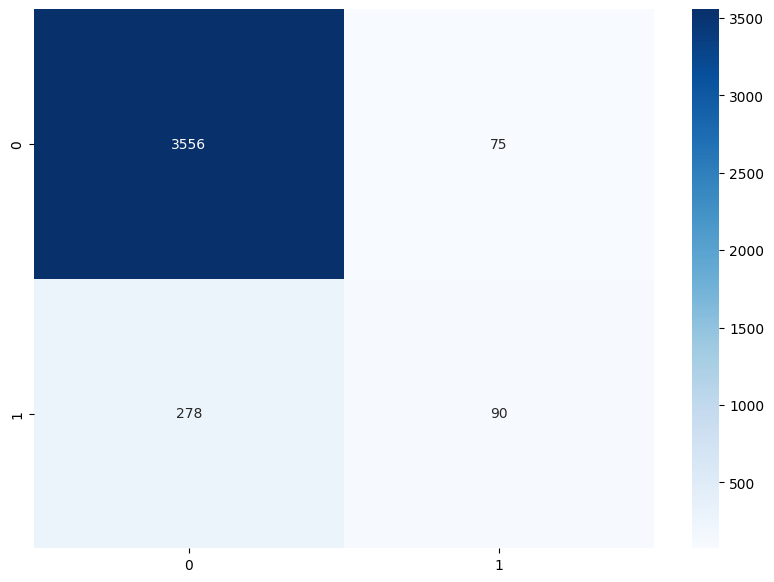

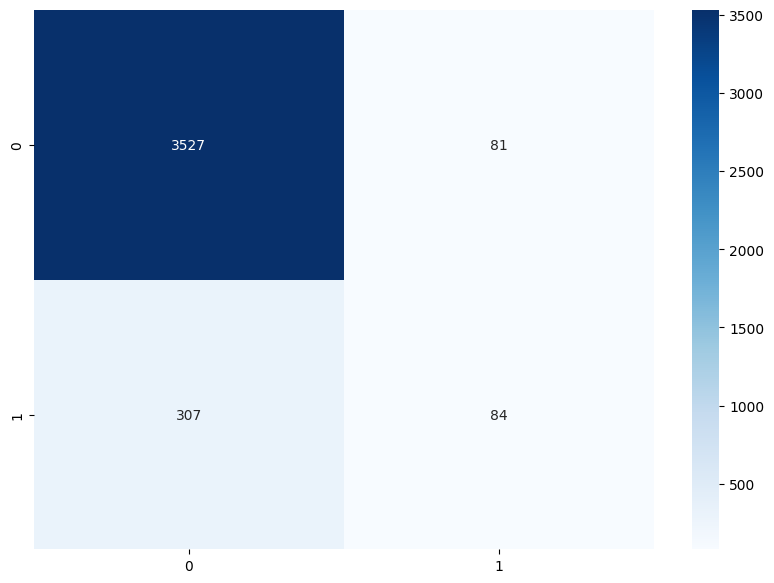

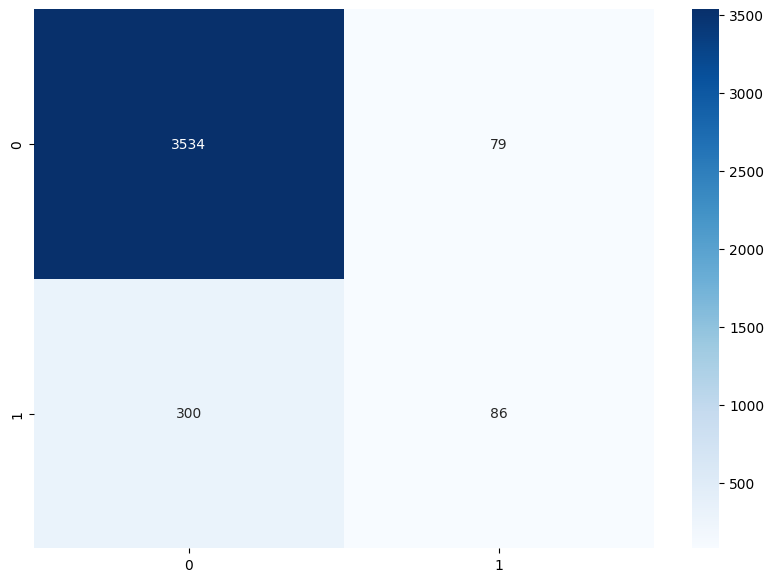

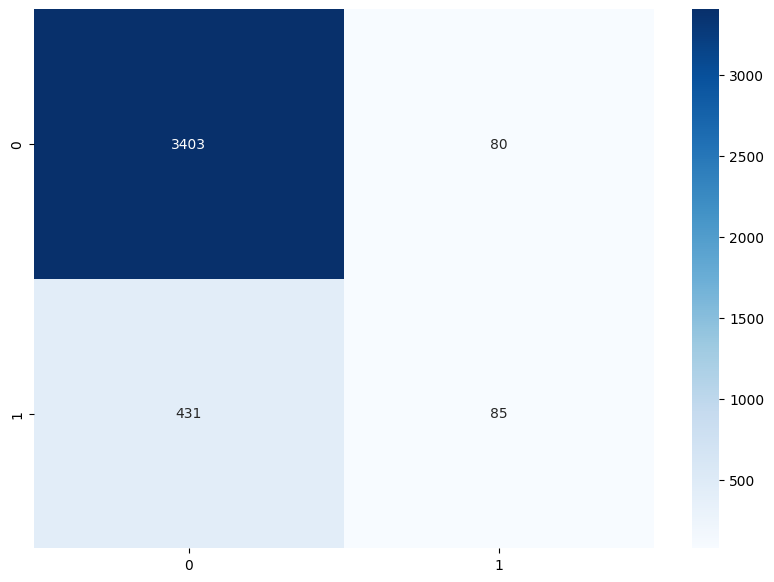

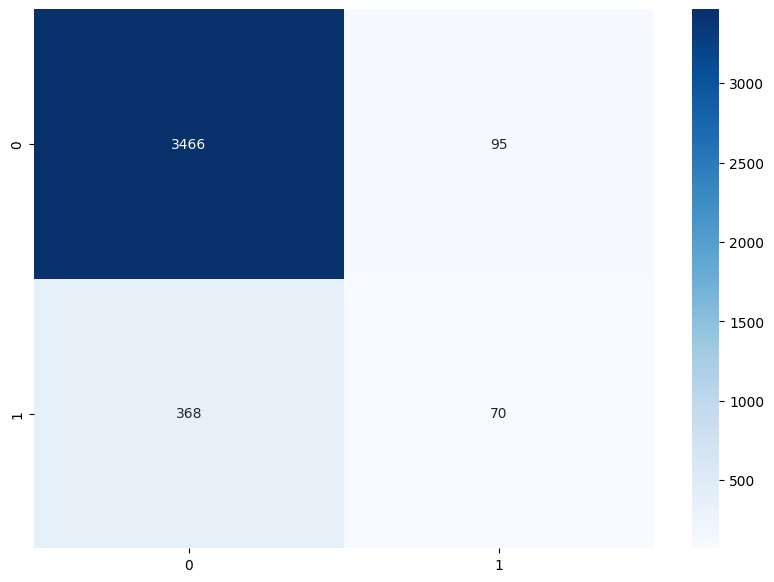

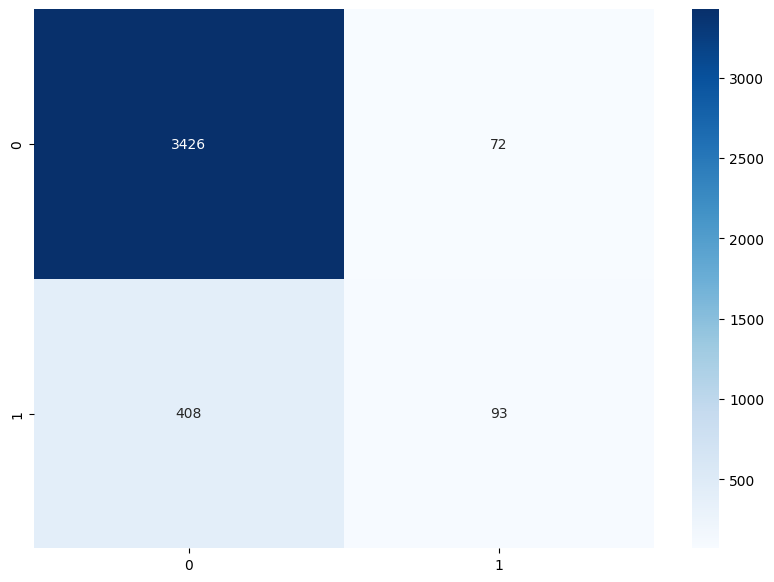

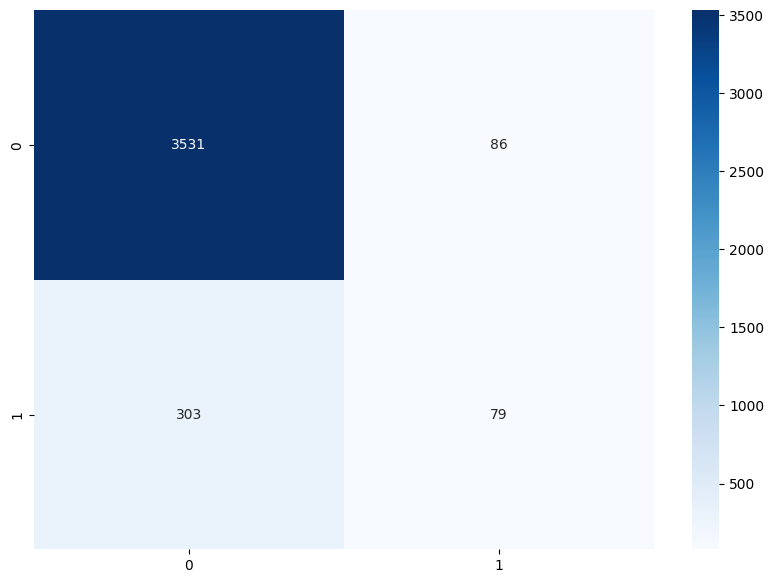

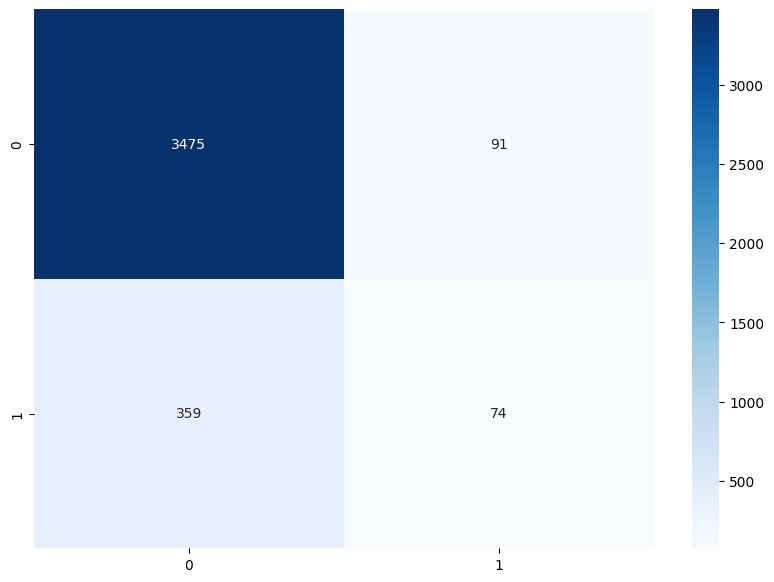

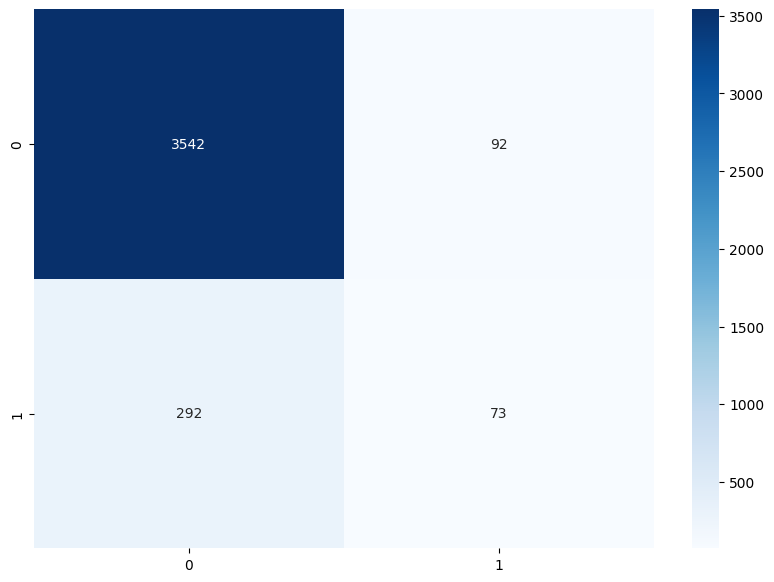

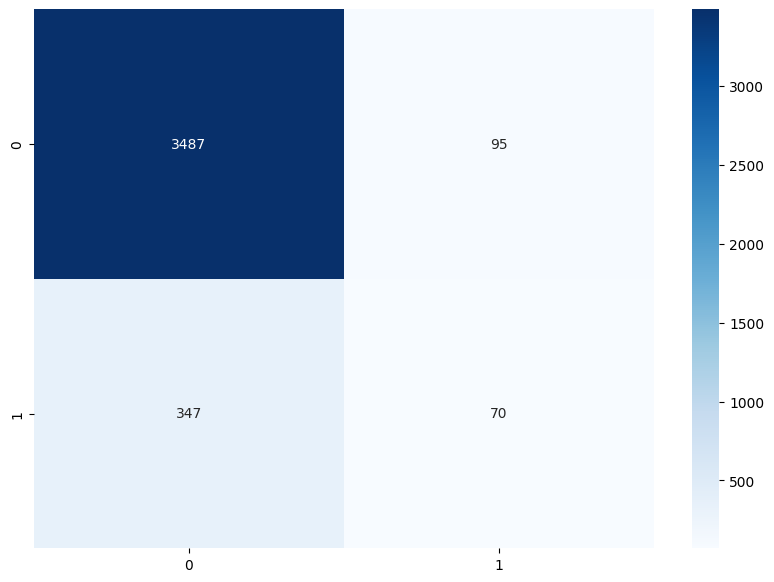

In [16]:
#%% imports
import torch
from torch_geometric.data import Data, Dataset, DataLoader
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import optuna
import os
from rdkit import Chem

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")




def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def train_one_epoch(epoch, model, train_loader, optimizer, loss_fn):
    all_preds = []
    all_labels = []
    running_loss = 0.0
    step = 0
    for _, batch in enumerate(tqdm(train_loader)):
        batch.to(device)
        optimizer.zero_grad()
        pred = model(batch.x.float(), batch.edge_attr.float(), batch.edge_index, batch.batch)
        loss = loss_fn(torch.squeeze(pred), batch.y.float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        step += 1
        all_preds.append(np.rint(torch.sigmoid(pred).cpu().detach().numpy()))
        all_labels.append(batch.y.cpu().detach().numpy())
    all_preds = np.concatenate(all_preds).ravel()
    all_labels = np.concatenate(all_labels).ravel()
    calculate_metrics(all_preds, all_labels, epoch, "train")
    return running_loss/step

def test(epoch, model, test_loader, loss_fn):
    all_preds = []
    all_preds_raw = []
    all_labels = []
    running_loss = 0.0
    step = 0
    for batch in test_loader:
        batch.to(device)
        pred = model(batch.x.float(), batch.edge_attr.float(), batch.edge_index, batch.batch)
        loss = loss_fn(torch.squeeze(pred), batch.y.float())
        running_loss += loss.item()
        step += 1
        all_preds.append(np.rint(torch.sigmoid(pred).cpu().detach().numpy()))
        all_preds_raw.append(torch.sigmoid(pred).cpu().detach().numpy())
        all_labels.append(batch.y.cpu().detach().numpy())

    all_preds = np.concatenate(all_preds).ravel()
    all_labels = np.concatenate(all_labels).ravel()
    print(all_preds_raw[0][:10])
    print(all_preds[:10])
    print(all_labels[:10])
    calculate_metrics(all_preds, all_labels, epoch, "test")
    log_conf_matrix(all_preds, all_labels, epoch)
    return running_loss/step

def log_conf_matrix(y_pred, y_true, epoch):
    cm = confusion_matrix(y_pred, y_true)
    classes = ["0", "1"]
    df_cfm = pd.DataFrame(cm, index = classes, columns = classes)
    plt.figure(figsize = (10,7))
    cfm_plot = sns.heatmap(df_cfm, annot=True, cmap='Blues', fmt='g')
    cfm_plot.figure.savefig(f'data/images/cm_{epoch}.png')

def calculate_metrics(y_pred, y_true, epoch, type):
    print(f"\n Confusion matrix: \n {confusion_matrix(y_pred, y_true)}")
    print(f"F1 Score: {f1_score(y_true, y_pred)}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    print(f"Precision: {prec}")
    print(f"Recall: {rec}")
    try:
        roc = roc_auc_score(y_true, y_pred)
        print(f"ROC AUC: {roc}")
    except:
        print(f"ROC AUC: not defined")


train_dataset = MoleculeDataset(root="data/", filename="HIV_train_oversampled.csv")
test_dataset = MoleculeDataset(root="data/", filename="HIV_test.csv", test=True)
train_dataset[0].edge_attr.shape[1]
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# %% Run the training
def objective(trial):
    # Define hyperparameters to optimize
    model_params = {
        "feature_size": train_dataset[0].x.shape[1],  # Adjust as per your dataset
        "model_embedding_size": trial.suggest_int("model_embedding_size", 32, 256),
        "model_attention_heads": trial.suggest_int("model_attention_heads", 1, 8),
        "model_layers": trial.suggest_int("model_layers", 1, 4),
        "model_dropout_rate": trial.suggest_uniform("model_dropout_rate", 0.0, 0.5),
        "model_top_k_ratio": trial.suggest_uniform("model_top_k_ratio", 0.1, 0.9),
        "model_top_k_every_n": trial.suggest_int("model_top_k_every_n", 1, 3),
        "model_dense_neurons": trial.suggest_int("model_dense_neurons", 64, 512),
        "model_edge_dim":train_dataset[0].edge_attr.shape[1]
,
        # Add other model hyperparameters here
    }

    # Define other training hyperparameters
    params = {
        "batch_size": 32,
        "learning_rate": 0.001,
        "sgd_momentum": 0.9,
        "weight_decay": 1e-5,
        "scheduler_gamma": 0.95,
        "pos_weight": 1.0,
        # Add other general hyperparameters here
    }

    # Initialize model with optimized parameters
    model_params.update({
        "feature_size": train_dataset[0].x.shape[1]  # Assuming this is how you determine feature_size
    })
    model = GNN(**model_params).to(device)

    # Define optimizer, loss function, and scheduler
    optimizer = torch.optim.SGD(model.parameters(), lr=params["learning_rate"], momentum=params["sgd_momentum"],
                                weight_decay=params["weight_decay"])
    scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=params["scheduler_gamma"])
    weight = torch.tensor([params["pos_weight"]], dtype=torch.float32).to(device)
    loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=weight)

    # Training loop
    best_loss = 1000
    early_stopping_counter = 0
    for epoch in range(300):
        if early_stopping_counter <= 10:
            # Training phase
            model.train()
            train_loss = train_one_epoch(epoch, model, train_loader, optimizer, loss_fn)

            # Evaluation phase
            model.eval()
            if epoch % 5 == 0:
                test_loss = test(epoch, model, test_loader, loss_fn)
                if test_loss < best_loss:
                    best_loss = test_loss
                    early_stopping_counter = 0
                else:
                    early_stopping_counter += 1

                scheduler.step()

    return best_loss

print("Running hyperparameter search...")
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Get best parameters and best score
best_params = study.best_params
best_score = study.best_value
print(f"Best parameters found: {best_params}")
print(f"Best score achieved: {best_score}")